# Tic Tac Toe Game (Noughts and Crosses)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version

from gamelearner import *
python_version()

'3.6.6'

## Game dynamics

In [3]:
game = TicTacToeGame()
game

TicTacToeGame(moves=[])

In [4]:
game.roles

[1, 2]

In [5]:
game.marks

['X', 'O']

In [6]:
game.state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [7]:
game.make_move((1, (0, 2)))
game.make_move((2, (0, 1)))
game.make_move((1, (1, 1)))
game.make_move((2, (2, 2)))

In [8]:
game.show_state()

_ O X
_ X _
_ _ O


In [9]:
game.check_if_game_over()

False

In [10]:
game.show_moves()

1 (1, (0, 2))
2 (2, (0, 1))
3 (1, (1, 1))
4 (2, (2, 2))


In [11]:
game.turn

1

In [12]:
game.available_positions()

[(0, 0), (1, 0), (1, 2), (2, 0), (2, 1)]

In [13]:
try:
    game.make_move((2, (2,0)))
except ValueError as err:
    print(err)

It is not player 2's turn.


In [14]:
game.show_state()

_ O X
_ X _
_ _ O


In [15]:
game.game_over

False

In [16]:
print(game.winner)

None


In [17]:
game.reverse_move()

In [18]:
game.show_state()

_ O X
_ X _
_ _ _


In [19]:
print(game.winner)

None


In [20]:
game.make_move((2, (1,2)))

In [21]:
game.get_rewards()

[]

In [22]:
game.make_move((1, (2,0)))
game.show_state()

_ O X
_ X O
X _ _


In [23]:
game.game_over, game.winner

(True, 1)

In [24]:
game.get_rewards()

[(1, 1.0), (2, 0.0)]

In [25]:
try:
    game.make_move((2, (2,1)))
except AssertionError as err:
    print(err)

Player 1 has already won


### Playing with Human Players

In [26]:
players = [HumanPlayer("Jill"), HumanPlayer("Jack")]
players

[HumanPlayer('Jill')), HumanPlayer('Jack'))]

In [27]:
game = TicTacToeGame()
game

TicTacToeGame(moves=[])

In [28]:
game.show_state()
players[0].make_move(game, role=1)

_ _ _
_ _ _
_ _ _
Jill's turn (row, col): 0,0


In [29]:
game.show_state()
players[1].make_move(game, role=2)

X _ _
_ _ _
_ _ _
Jack's turn (row, col): 1,1


In [30]:
game.show_state()

X _ _
_ O _
_ _ _


## Using the game controller

In [31]:
game = TicTacToeGame()
players = [ExpertPlayer("EXP1"), ExpertPlayer("EXP2")]

In [32]:
ctrl = GameController(game, players)
ctrl

GameController(TicTacToeGame(moves=[]), [ExpertPlayer('EXP1'), ExpertPlayer('EXP2')])

In [33]:
ctrl.player_roles

{ExpertPlayer('EXP1'): 1, ExpertPlayer('EXP2'): 2}

In [34]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['EXP1', 'EXP2']
_ _ _
_ _ _
_ _ _
EXP1's turn (row, col): (1, (1, 1))
_ _ _
_ X _
_ _ _
EXP2's turn (row, col): (2, (2, 2))
_ _ _
_ X _
_ _ O
EXP1's turn (row, col): (1, (0, 0))
X _ _
_ X _
_ _ O
EXP2's turn (row, col): (2, (2, 0))
X _ _
_ X _
O _ O
EXP1's turn (row, col): (1, (2, 1))
X _ _
_ X _
O X O
EXP2's turn (row, col): (2, (0, 1))
X O _
_ X _
O X O
EXP1's turn (row, col): (1, (0, 2))
X O X
_ X _
O X O
EXP2's turn (row, col): (2, (1, 0))
X O X
O X _
O X O
EXP1's turn (row, col): (1, (1, 2))
X O X
O X X
O X O
Game over!
Draw


## Competition between computer players

In [35]:
game = TicTacToeGame()
players = [TDLearner('TD1'), ExpertPlayer('EXPERT')]
ctrl = GameController(game, players)

In [36]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['TD1', 'EXPERT']
_ _ _
_ _ _
_ _ _
TD1's turn (row, col): (2, 1)
_ _ _
_ _ _
_ X _
EXPERT's turn (row, col): (2, (1, 1))
_ _ _
_ O _
_ X _
TD1's turn (row, col): (0, 0)
X _ _
_ O _
_ X _
EXPERT's turn (row, col): (2, (2, 0))
X _ _
_ O _
O X _
TD1's turn (row, col): (0, 1)
X X _
_ O _
O X _
EXPERT's turn (row, col): (2, (0, 2))
X X O
_ O _
O X _
Game over!
EXPERT won


In [37]:
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))


Player TD1
  played: 1, wins: 0, losses: 1

Player EXPERT
  played: 1, wins: 1, losses: 0


## Train a TD Learner

In [38]:
td_learner = TDLearner('TD1')
computer_players = [td_learner, ExpertPlayer('EXPERT')]

In [39]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 583, drew 417
EXPERT: won 583, lost 0, drew 417


In [40]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 206, drew 794
EXPERT: won 206, lost 0, drew 794


## Now play against the computer!

In [41]:
game = TicTacToeGame()
players = [HumanPlayer("You"), td_learner]
ctrl = GameController(game, players)

In [42]:
while True:
    game.reset()
    ctrl.play()
    text = input("Press enter to play again or q to quit: ")
    if text.strip().lower() == 'q':
        break

print("Results")        
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))

Game of Tic Tac Toe with 2 players ['You', 'TD1']
_ _ _
_ _ _
_ _ _
You's turn (row, col): 1,1
_ _ _
_ X _
_ _ _
TD1's turn (row, col): (2, 0)
_ _ _
_ X _
O _ _
You's turn (row, col): 0,2
_ _ X
_ X _
O _ _
TD1's turn (row, col): (0, 0)
O _ X
_ X _
O _ _
You's turn (row, col): 1,0
O _ X
X X _
O _ _
TD1's turn (row, col): (1, 2)
O _ X
X X O
O _ _
You's turn (row, col): 2,1
O _ X
X X O
O X _
TD1's turn (row, col): (2, 2)
O _ X
X X O
O X O
You's turn (row, col): 0,1
You you won!
O X X
X X O
O X O
Game over!
You won
Press enter to play again or q to quit: q
Results

Player You
  played: 1, wins: 1, losses: 0

Player TD1
  played: 2001, wins: 0, losses: 790


## TD Parameter Optimization

In [43]:
results = {
    'learning_rate': [],
    'off_policy_rate': [],
    'Wins (1000)': [],
    'Losses (1000)': [],
    'Wins (2000)': [],
    'Losses (2000)': []
}

In [44]:
learning_rates = [0.5, 0.25, 0.1]
off_policy_rates = [0.0, 0.1]

In [45]:
for lr in learning_rates:
    for opr in off_policy_rates:
        print("\nlr: %s, opr: %s" % (str(lr), str(opr)))
        print("Training against expert...")
        td_learner = TDLearner('TD', learning_rate=lr, off_policy_rate=opr)
        computer_players = [td_learner, ExpertPlayer('EXPERT')]
        train_computer_players(computer_players, show=False)
        results['learning_rate'].append(lr)
        results['off_policy_rate'].append(opr)
        results['Wins (1000)'].append(td_learner.games_won)
        results['Losses (1000)'].append(td_learner.games_lost)
        train_computer_players(computer_players, show=False)
        results['Wins (2000)'].append(td_learner.games_won)
        results['Losses (2000)'].append(td_learner.games_lost)


lr: 0.5, opr: 0.0
Training against expert...

lr: 0.5, opr: 0.1
Training against expert...

lr: 0.25, opr: 0.0
Training against expert...

lr: 0.25, opr: 0.1
Training against expert...

lr: 0.1, opr: 0.0
Training against expert...

lr: 0.1, opr: 0.1
Training against expert...


In [46]:
results

{'learning_rate': [0.5, 0.5, 0.25, 0.25, 0.1, 0.1],
 'off_policy_rate': [0.0, 0.1, 0.0, 0.1, 0.0, 0.1],
 'Wins (1000)': [0, 0, 0, 0, 0, 0],
 'Losses (1000)': [479, 598, 492, 590, 495, 583],
 'Wins (2000)': [0, 0, 0, 0, 0, 0],
 'Losses (2000)': [550, 809, 557, 805, 560, 800]}

In [47]:
df = pd.DataFrame(results)
df

,learning_rate,off_policy_rate,Wins (1000),Losses (1000),Wins (2000),Losses (2000)
0,0.50,0.0,0,479,0,550
1,0.50,0.1,0,598,0,809
2,0.25,0.0,0,492,0,557
3,0.25,0.1,0,590,0,805
4,0.10,0.0,0,495,0,560
5,0.10,0.1,0,583,0,800


In [48]:
good_results = {
    'After 1000 iterations:': [df['Wins (1000)'].idxmax(), df['Losses (1000)'].idxmin()],
    'After 2000 iterations:': [df['Wins (2000)'].idxmax(), df['Losses (2000)'].idxmin()]
}
good_results

{'After 1000 iterations:': [0, 0], 'After 2000 iterations:': [0, 0]}

## Look at learning rates

In [73]:
td_players = [TDLearner("TD %d" % i) for i in range(4)]
rd = RandomPlayer("Random")
ex = ExpertPlayer("Expert")

opponents = [rd, ex, td_players[3]]

In [74]:
td_players[0:3], opponents

([TDLearner('TD 0'), TDLearner('TD 1'), TDLearner('TD 2')],
 [RandomPlayer('Random'), ExpertPlayer('Expert'), TDLearner('TD 3')])

In [75]:
import datetime

# This can take a long time!
start_time = datetime.datetime.now()
print("Start time:", start_time)

scores = {}
index = []
n_iter = 500

def player_key(p1, p2):
    return "%s vs. %s" % (p1.name, p2.name)

for td_player, opponent in zip(td_players[0:3], opponents):
    scores[player_key(td_player, opponent)] = [test_player(td_player)]
scores[ex.name] = [test_player(ex)]

index.append(td_player.games_played)

iteration = 0
iterations = [0]

for epoch in range(100):
    
    for td_player, opponent in zip(td_players[0:3], opponents):
        train_computer_players([td_player, opponent], iterations=n_iter,
                               show=False)
        key = "%s vs. %s" % (td_player.name, opponent.name)
        scores[key].append(test_player(td_player))
    scores[ex.name].append(test_player(ex))

    index.append(td_player.games_played)
    iteration += n_iter
    iterations.append(iteration)
    print(iteration, "%5.2f %5.2f %5.2f %5.2f" % tuple(s[-1] for s in 
                                                     scores.values()))

print("End time:", datetime.datetime.now() - start_time)

Start time: 2018-10-05 23:02:30.917201
500  0.16  0.14  0.06  0.98
1000  0.25  0.20  0.17  0.94
1500  0.31  0.33  0.19  0.96
2000  0.38  0.27  0.20  0.94
2500  0.39  0.30  0.38  0.94
3000  0.41  0.26  0.22  0.94
3500  0.42  0.37  0.42  0.98
4000  0.32  0.32  0.36  0.92
4500  0.31  0.45  0.55  0.96
5000  0.46  0.40  0.58  0.94
5500  0.34  0.36  0.60  0.98
6000  0.39  0.33  0.37  0.96
6500  0.33  0.39  0.43  0.98
7000  0.38  0.35  0.64  0.96
7500  0.42  0.41  0.53  0.94
8000  0.39  0.44  0.60  0.96
8500  0.56  0.42  0.35  0.90
9000  0.60  0.37  0.43  0.94
9500  0.54  0.37  0.43  0.98
10000  0.50  0.32  0.46  0.98
10500  0.53  0.52  0.60  0.96
11000  0.56  0.43  0.69  0.98
11500  0.49  0.46  0.74  0.96
12000  0.44  0.24  0.58  0.96
12500  0.64  0.38  0.79  0.96
13000  0.62  0.47  0.67  0.98
13500  0.63  0.45  0.62  0.88
14000  0.71  0.56  0.59  0.98
14500  0.65  0.44  0.74  0.94
15000  0.65  0.36  0.65  0.96
15500  0.65  0.39  0.58  0.94
16000  0.69  0.40  0.76  0.98
16500  0.65  0.48  0.

In [76]:
pd.DataFrame(scores, index=index).head()

,TD 0 vs. Random,TD 1 vs. Expert,TD 2 vs. TD 3,Expert
0,0.007000,0.027840,0.022272,0.96
500,0.155040,0.136896,0.057024,0.98
1000,0.251712,0.197432,0.168480,0.94
1500,0.308568,0.331968,0.189584,0.96
2000,0.380808,0.270816,0.204288,0.94


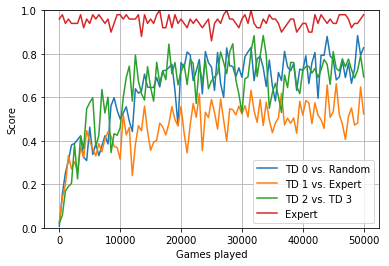

In [77]:
pd.DataFrame(scores, index=iterations).plot()
plt.xlabel("Games played")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid()
plt.savefig("learning_rates.pdf")